# FDS - Final Project (Steam Game Dataset)

The main objective of this project is to investigate the steam game dataset and manipulate it by ML techniques.

## Step 1: Load and Merge Data

Dataset using:

- games.csv
- tags.csv
- reviews.csv

Loading:

1. load steam game dataset into panda dataframe
2. identify problematic line
3. extract it out and reframe the frame

In [1]:
import pandas as pd
from csv import reader


# Create the DataFrame using the correct header and fixed data
games = pd.read_csv('dataset/games.csv')

# Continue with your processing for tags and reviews
categories = pd.read_csv('dataset/categories.csv', on_bad_lines='skip')
genres = pd.read_csv('dataset/genres.csv', on_bad_lines='skip')
reviews = pd.read_csv('dataset/reviews.csv', on_bad_lines='skip')
tags = pd.read_csv('dataset/tags.csv')

# Check duplicate item
print(games['app_id'].duplicated().sum())        # Should be 0
print(tags['app_id'].duplicated().sum())         # Should be 0
print(reviews['app_id'].duplicated().sum())      # Should be 0
print(categories['app_id'].duplicated().sum())   # Should be 0
print(genres['app_id'].duplicated().sum())       # Should be 0

# Remove duplicate item in each dataset
tags = tags.drop_duplicates(subset=['app_id'])
reviews = reviews.drop_duplicates(subset=['app_id'])
categories = categories.drop_duplicates(subset=['app_id'])
genres = genres.drop_duplicates(subset=['app_id'])

# Merge games and reviews
games['app_id'] = games['app_id'].astype(str)
tags['app_id'] = tags['app_id'].astype(str)
merged_df = pd.merge(games, tags, on='app_id', how='left')

reviews['app_id'] = reviews['app_id'].astype(str)
merged_df = pd.merge(merged_df, reviews, on="app_id", how='left')

categories['app_id'] = categories['app_id'].astype(str)
merged_df = pd.merge(merged_df, categories, on='app_id', how='left')

genres['app_id'] = genres['app_id'].astype(str)
merged_df = pd.merge(merged_df, genres, on='app_id', how='left')

# Check duplicate after merging

# Drop rows with missing review scores
merged_df.dropna(subset=['review_score'], inplace=True)

print(merged_df)


/var/folders/z0/t_vv9z0908vc5j6k_b12pwn40000gp/T/ipykernel_22861/2793734377.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv('dataset/games.csv')
/var/folders/z0/t_vv9z0908vc5j6k_b12pwn40000gp/T/ipykernel_22861/2793734377.py:11: DtypeWarning: Columns (0,1,3,4,5,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('dataset/reviews.csv', on_bad_lines='skip')


0
1627127
22
388189
230881
         app_id                        name release_date is_free  \
0            10              Counter-Strike   2000-11-01       0   
1            20       Team Fortress Classic   1999-04-01       0   
2            30               Day of Defeat   2003-05-01       0   
3            40          Deathmatch Classic   2001-06-01       0   
4            50   Half-Life: Opposing Force   1999-11-01       0   
...         ...                         ...          ...     ...   
140077  3297700                  Hacky Demo           \N       1   
140078  3297890        Quantum of Hope Demo           \N       1   
140079  3298020      A Night With: Succubus           \N       0   
140080  3298610               心所向往的北极星 Demo           \N       1   
140081  3298710  S.X.E. Slider: Hard Ridin'           \N       0   

       price_overview      tag review_score review_score_description positive  \
0                  19    1980s            9  Overwhelmingly Positive   2354

## Step 2: Filtering and Exploring(Visualizing) the dataset

Data cleaning and preprocessing:

1. clean the dataset: drop duplicates rows
2. remove unnecessary information
3. visualize it

In [13]:
from IPython.display import display

# Data frame cleaning
merged_df.shape
merged_df.drop_duplicates(subset="app_id", inplace=True)
merged_df = merged_df[merged_df['name'] != 'NaN']
merged_df = merged_df[merged_df['review_score'] != 0]
merged_df.rename(columns={'tag': 'game_type'}, inplace=True)
merged_df['name'] = merged_df['name'].str.split(',').str[0]
merged_df = merged_df.drop(columns=["steamspy_user_score", "steamspy_score_rank", "steamspy_positive", "steamspy_negative"])

# Strip leading/trailing spaces to clean up empty strings
merged_df['is_free'] = merged_df['is_free'].str.strip()

# Replace empty values with NaN or a meaningful default (e.g., 0)
merged_df['is_free'] = merged_df['is_free'].replace('', '0')

print(merged_df.info())
print("==========================================================")
display(merged_df)

# Create a review dataset
review_df = merged_df[['app_id', 'name', 'reviews', 'category', 'genre']].copy()

# select only reviews = ! "\N"
review_df = review_df[review_df['reviews'] != '\\N']
print(review_df.info())
print("==========================================================")
display(review_df)

<class 'pandas.core.frame.DataFrame'>
Index: 86116 entries, 0 to 139986
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   app_id                    86116 non-null  object
 1   name                      86116 non-null  object
 2   release_date              86116 non-null  object
 3   is_free                   85324 non-null  object
 4   price_overview            60733 non-null  object
 5   game_type                 78929 non-null  object
 6   review_score              86116 non-null  object
 7   review_score_description  86116 non-null  object
 8   positive                  86116 non-null  object
 9   negative                  86116 non-null  object
 10  total                     86116 non-null  object
 11  metacritic_score          86116 non-null  object
 12  reviews                   86116 non-null  object
 13  recommendations           86109 non-null  object
 14  category                  

,app_id,name,release_date,is_free,price_overview,game_type,review_score,review_score_description,positive,negative,total,metacritic_score,reviews,recommendations,category,genre
0,10,Counter-Strike,2000-11-01,0,19,1980s,9,Overwhelmingly Positive,235403,6207,241610,88,\N,153259,Family Sharing,Action
1,20,Team Fortress Classic,1999-04-01,0,99,1990's,8,Very Positive,7315,1094,8409,\N,\N,6268,Family Sharing,Action
2,30,Day of Defeat,2003-05-01,0,99,Action,8,Very Positive,6249,672,6921,79,\N,4146,Family Sharing,Action
3,40,Deathmatch Classic,2001-06-01,0,99,1990's,8,Very Positive,2542,524,3066,\N,\N,2218,Family Sharing,Action
4,50,Half-Life: Opposing Force,1999-11-01,0,99,1990's,9,Overwhelmingly Positive,22263,1111,23374,\N,\N,20144,Family Sharing,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139901,3282750,-Fell in love with the Nobility girl- Demo,2024-10-11,NaN,NaN,Adventure,8,Very Positive,70,0,70,\N,\N,\N,Game demo,Adventure
139903,3282810,Underworld Overseer Demo,2024-10-14,NaN,NaN,Action RPG,7,Positive,12,0,12,\N,“Underworld Overseer is the Dungeon Keeper spi...,\N,Game demo,Indie
139919,3283400,Streetball Fury Demo,2024-10-13,NaN,NaN,2D,7,Positive,10,1,11,\N,\N,\N,Co-op,Action
139946,3284630,Campervan Simulator Demo,2024-10-16,NaN,NaN,NaN,5,Mixed,11,10,21,\N,\N,\N,Game demo,Adventure


<class 'pandas.core.frame.DataFrame'>
Index: 10894 entries, 24 to 139903
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   app_id    10894 non-null  object
 1   name      10894 non-null  object
 2   reviews   10894 non-null  object
 3   category  10834 non-null  object
 4   genre     10834 non-null  object
dtypes: object(5)
memory usage: 510.7+ KB
None


,app_id,name,reviews,category,genre
24,570,Dota 2,“Современный многопользовательский шедевр.”<br...,Включён античит Valve,Бесплатные
30,1200,Red Orchestra: Ostfront 41-45,<strong>&quot;... RO is also one of the market...,Family Sharing,Action
36,1510,Uplink,75 – Metacritic<br>,Family Sharing,Indie
51,1900,Earth 2160,“It may not replace &quot;Star Craft&quot; in ...,Co-op,Strategy
52,1930,Two Worlds Epic Edition,“The big player alongside Oblivion and Gothic ...,Co-op,RPG
...,...,...,...,...,...
138341,3238120,Lonely Mountains: Snow Riders Demo,“Lonely Mountains: Snow Riders is a slick ski ...,Full controller support,Indie
138504,3242370,101 Cats Hidden in Australia,“🏆 I loved! ❤️❤️❤️”<br />\n\\nvaldi<br />\n\\n...,Family Sharing,Casual
139128,3259160,FREE DUROV - DEMO,“Add to wishlist and save Pasha”<br>CyberTopor...,Game demo,Adventure
139231,3261900,Dinocop Demo,“It’s a lot of fun and the game does a great j...,Full controller support,Adventure


/var/folders/z0/t_vv9z0908vc5j6k_b12pwn40000gp/T/ipykernel_83860/268464262.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=merged_df, x='review_score', order=sorted(merged_df['review_score'].unique()), palette="viridis")


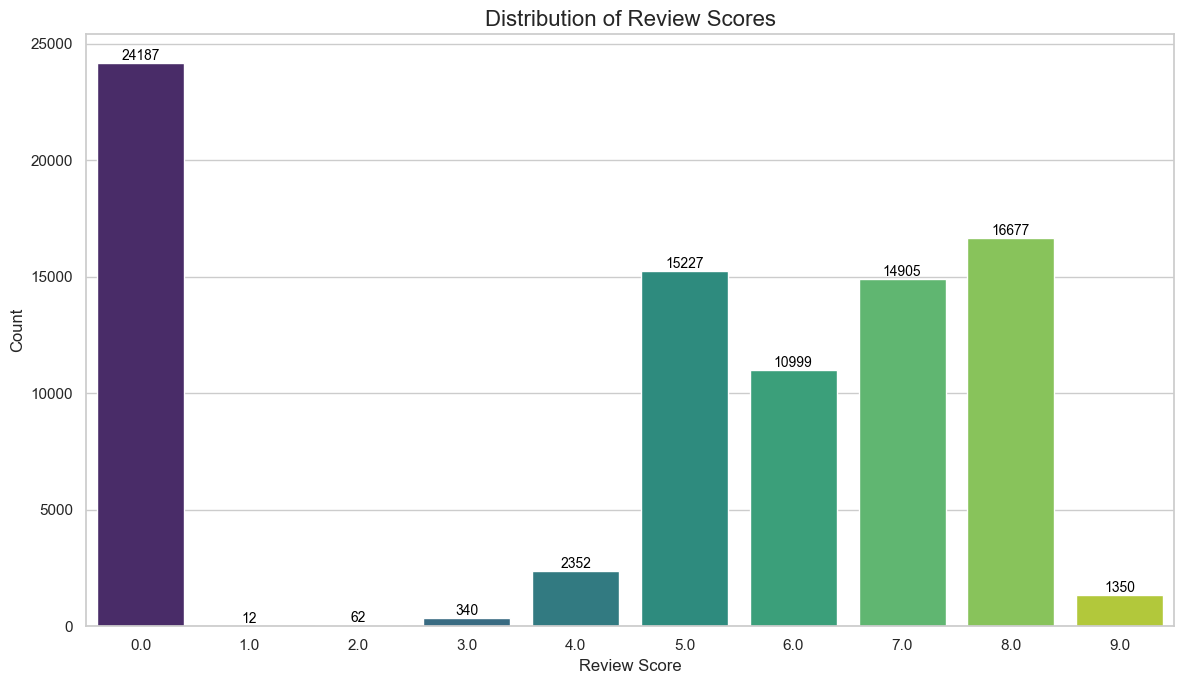

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'review_score' to numeric, coercing errors to NaN
merged_df['review_score'] = pd.to_numeric(merged_df['review_score'], errors='coerce')

# Drop NaN values that resulted from the conversion
merged_df.dropna(subset=['review_score'], inplace=True)

# Plot the distribution of review scores
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=merged_df, x='review_score', order=sorted(merged_df['review_score'].unique()), palette="viridis")
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


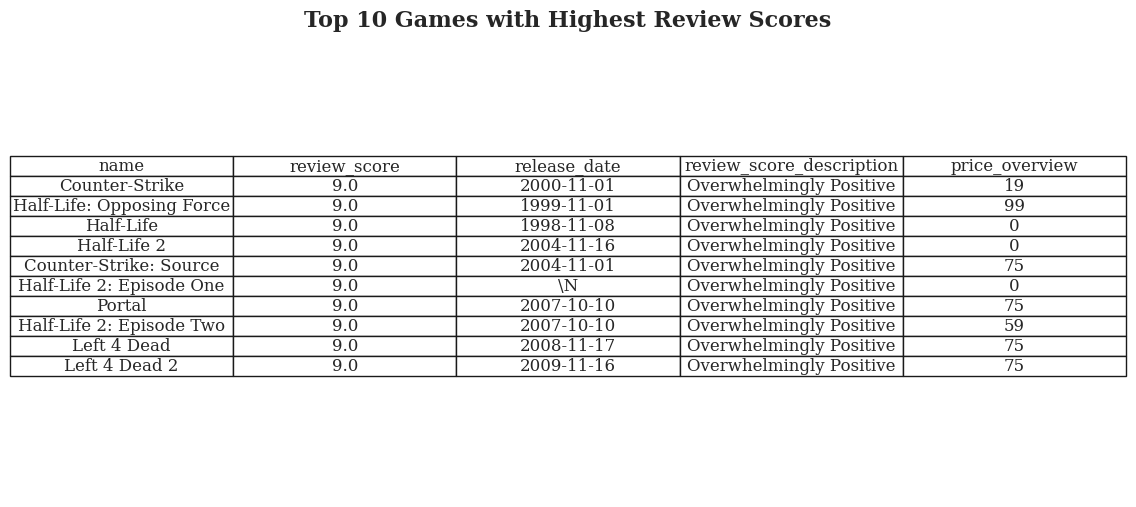

In [15]:
# Plot the top 10 games with the highest review scores
merged_df['review_score'] = pd.to_numeric(merged_df['review_score'], errors='coerce')
top_10_games = merged_df.nlargest(10, 'review_score')

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table_data = top_10_games[['name', 'review_score', 'release_date', 'review_score_description', 'price_overview']]
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Set font family to serif for all text elements
plt.title('Top 10 Games with Highest Review Scores', fontsize=16, fontweight='bold', fontfamily='serif')
for key, cell in table.get_celld().items():
    cell.set_text_props(fontfamily='serif')

plt.show()

## Step 3: Apply ML techniques

Key Steps to Start

1. Clean the dataset (fix malformed fields, handle missing values).
2. Feature engineering: Convert languages to a one-hot encoded list (e.g., "English", "French").
3. Normalize/scale numerical features (e.g., price_overview, review_score).
4. Exploratory Data Analysis (EDA): Visualize correlations between variables (e.g., price vs. reviews)

---

ML techniques

1. Regression tasks - Linear Regression
2. Classification tasks - Logistic Regression (Popular vs Unpopular)
3. Recommendation systems  - content-based filtering

### Classify the popular and unpopular games - logistic regression

Finally using a pie chart to represent

Logistic Regression Accuracy: 0.7984091041049759


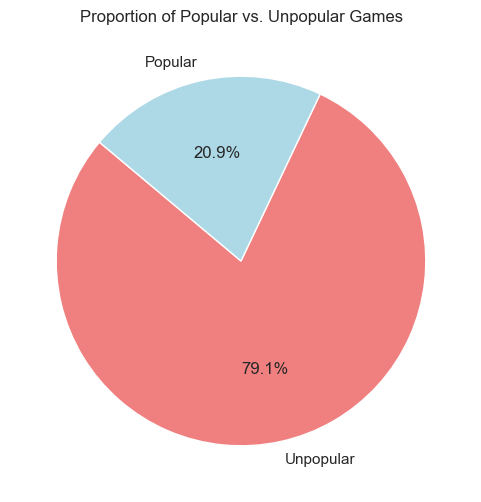

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

logistic_regression_df = merged_df.copy()

# Convert release_date to datetime and extract the year
logistic_regression_df['release_year'] = pd.to_datetime(
    logistic_regression_df['release_date'], errors='coerce'
).dt.year

# Define target variable: 1 if review_score > 7, else 0
logistic_regression_df["popular"] = (logistic_regression_df["review_score"] > 7).astype(int)

# Features (using release_year instead of release_date)
features = ["price_overview", "metacritic_score", "release_year"] + \
           list(logistic_regression_df.filter(like="genre_"))
X = logistic_regression_df[features]
y = logistic_regression_df["popular"]

# Convert features to numeric (in case of string representation)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean
X = X.fillna(X.mean())

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Count unique values and plot
popular_counts = logistic_regression_df["popular"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(popular_counts, labels=["Unpopular", "Popular"], autopct="%1.1f%%", 
        colors=["lightcoral", "lightblue"], startangle=140)
plt.title("Proportion of Popular vs. Unpopular Games")
plt.show()

### Content-Based Game Recommendation System - K-means

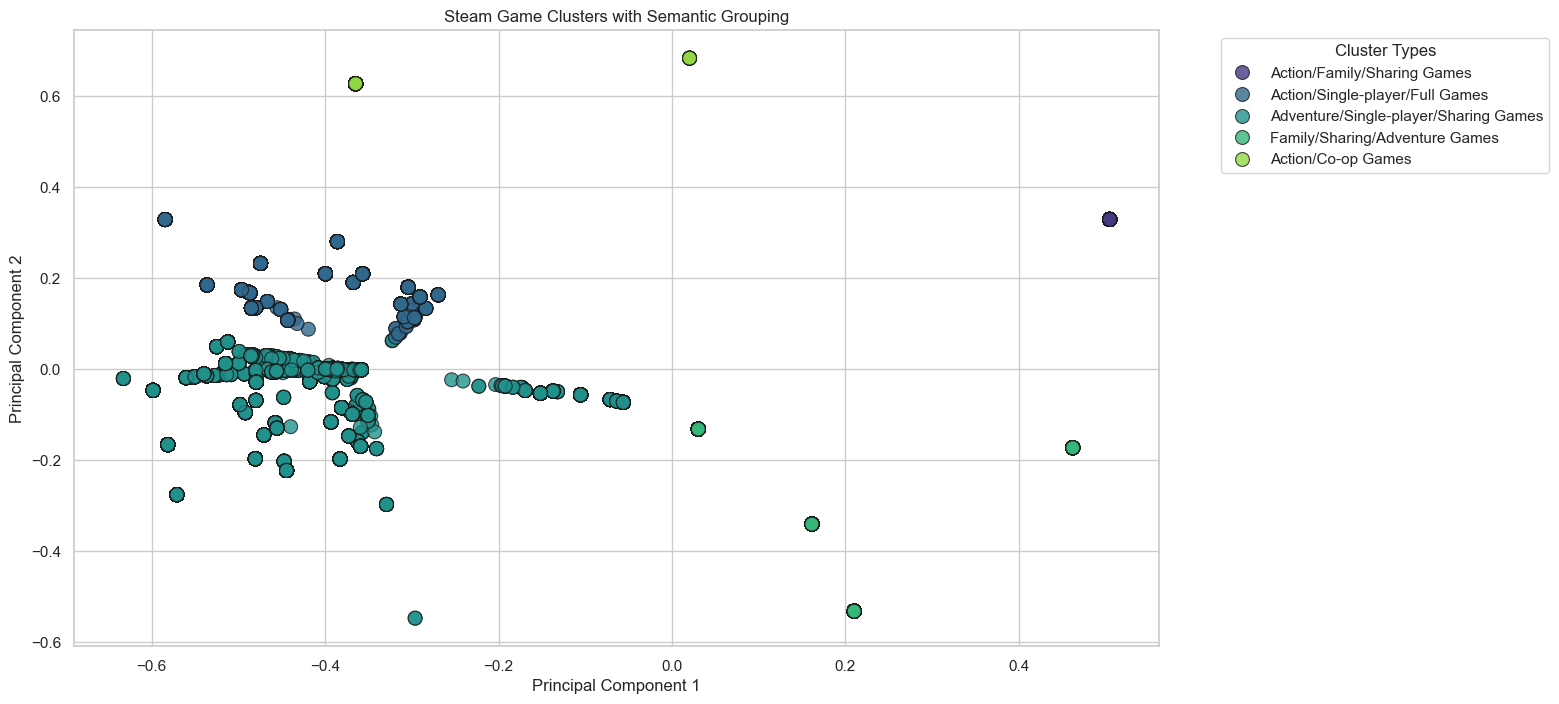


Cluster 0 (Action/Family/Sharing Games)
----------------------------------------
Top Features:
Action     20656
Family     20656
Sharing    20656

Example Games:
           Counter-Strike
    Team Fortress Classic
            Day of Defeat
       Deathmatch Classic
Half-Life: Opposing Force

Cluster 1 (Adventure/Single-player/Sharing Games)
----------------------------------------
Top Features:
Adventure        5511
Single-player    5100
Sharing          4161
Family           4161
Casual           4032

Example Games:
 Half-Life 2: Lost Coast
Half-Life 2: Episode One
                  Dota 2
        Counter-Strike 2
   Rag Doll Kung Fu Demo

Cluster 2 (Family/Sharing/Adventure Games)
----------------------------------------
Top Features:
Family       27878
Sharing      27878
Adventure    12419
Casual       10585
Indie         4748

Example Games:
                          Rag Doll Kung Fu
                                  Darwinia
                                    Uplink
           

/var/folders/z0/t_vv9z0908vc5j6k_b12pwn40000gp/T/ipykernel_83860/1744142092.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cluster_label", data=content_based_df, palette="viridis", order=content_based_df["cluster_label"].value_counts().index)


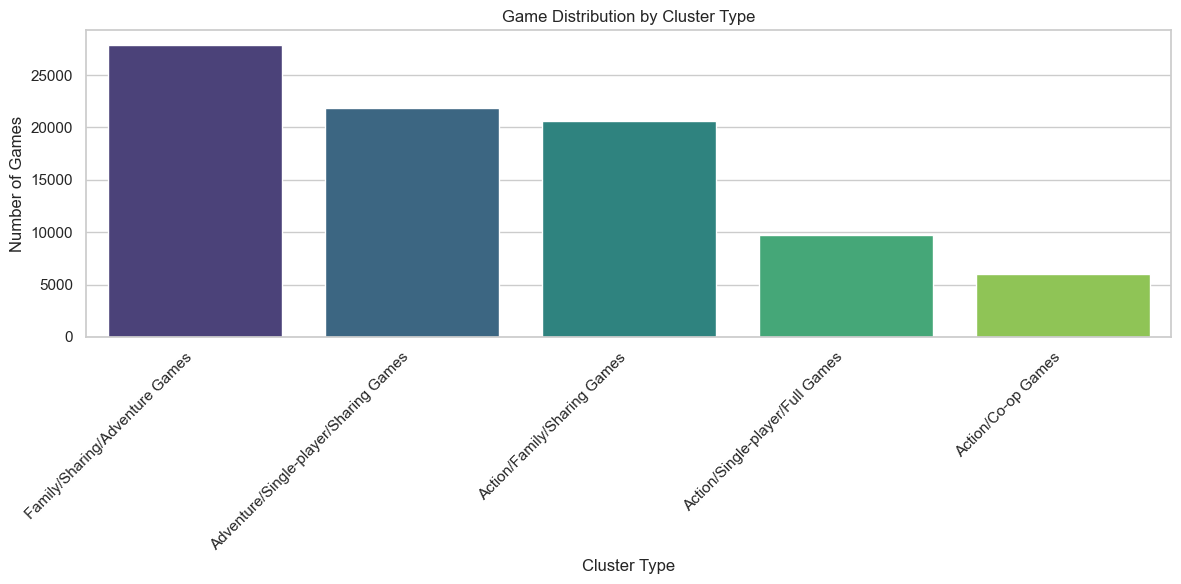

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming merged_df contains your game data with "name", "genre", and "category"
# Prepare features
content_based_df = merged_df.copy()
content_based_df["combined_features"] = content_based_df["genre"].fillna("") + " " + content_based_df["category"].fillna("")

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=500)
tfidf_matrix = tfidf.fit_transform(content_based_df["combined_features"])

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Add cluster information to DataFrame
content_based_df["cluster"] = clusters

# Generate cluster descriptions
def get_cluster_labels(df, n_terms=3):
    cluster_labels = {}
    for cluster in sorted(df["cluster"].unique()):
        # Get top terms for the cluster
        terms = " ".join(df[df["cluster"] == cluster]["combined_features"]).split()
        top_terms = pd.Series(terms).value_counts().head(n_terms).index.tolist()
        # Create descriptive label
        cluster_labels[cluster] = f"{'/'.join(top_terms)} Games"
    return cluster_labels

# Get and apply cluster labels
cluster_labels = get_cluster_labels(content_based_df)
content_based_df["cluster_label"] = content_based_df["cluster"].map(cluster_labels)

# Visualize clusters with descriptions
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=content_based_df["cluster_label"],
    palette="viridis",
    s=100,
    alpha=0.8,
    edgecolor="k",
    legend="full"
)
plt.title("Steam Game Clusters with Semantic Grouping")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Cluster Types")
plt.show()

# Enhanced cluster analysis
def print_cluster_details(df):
    for cluster in sorted(df["cluster"].unique()):
        cluster_data = df[df["cluster"] == cluster]
        
        print(f"\nCluster {cluster} ({cluster_labels[cluster]})")
        print("-" * 40)
        print("Top Features:")
        terms = " ".join(cluster_data["combined_features"]).split()
        print(pd.Series(terms).value_counts().head(5).to_string())
        
        print("\nExample Games:")
        print(cluster_data["name"].head(5).to_string(index=False))

print_cluster_details(content_based_df)

# Visualize cluster distribution with labels
plt.figure(figsize=(12, 6))
sns.countplot(x="cluster_label", data=content_based_df, palette="viridis", order=content_based_df["cluster_label"].value_counts().index)
plt.title("Game Distribution by Cluster Type")
plt.xlabel("Cluster Type")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()